Check the 6 layer CNN Model for another slice of train/valid and test images.  

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
batch_size = 32
img_height = 224
img_width = 224
train_dir = '../input/marble-surface-anomaly-detection-2/dataset/train'
test_dir = '../input/marble-surface-anomaly-detection-2/dataset/test'

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=223, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 4 classes.
Using 1800 files for training.


2022-01-24 10:39:44.882412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-24 10:39:45.023987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-24 10:39:45.025108: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-24 10:39:45.028637: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=223,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 4 classes.
Using 449 files for validation.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 688 files belonging to 4 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)

['crack', 'dot', 'good', 'joint']


2022-01-24 10:40:22.714297: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


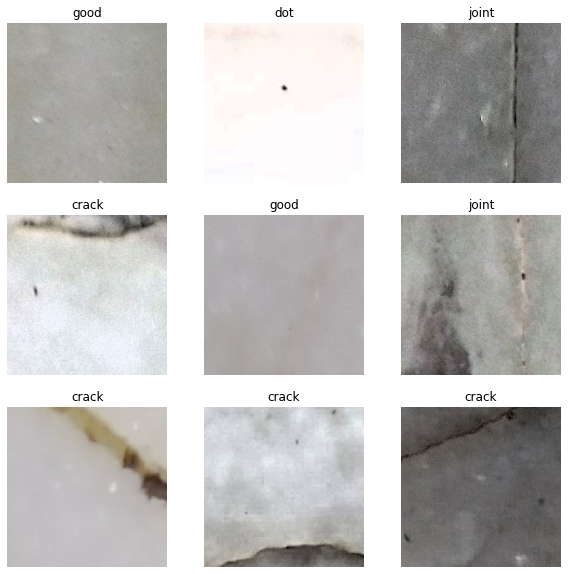

In [7]:
## Visualize train dataset images 

image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

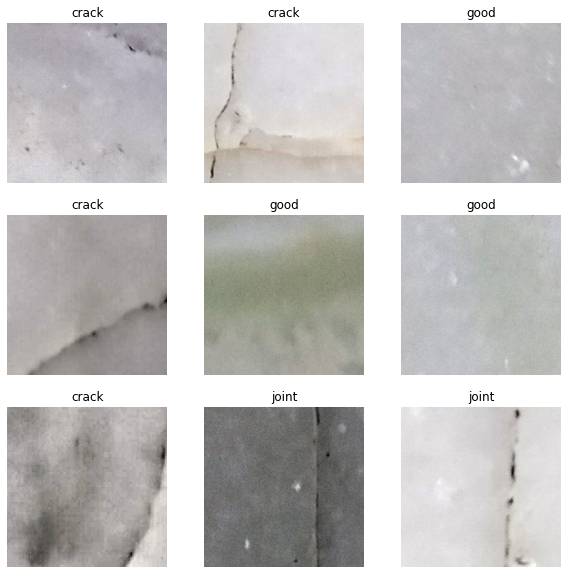

In [8]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

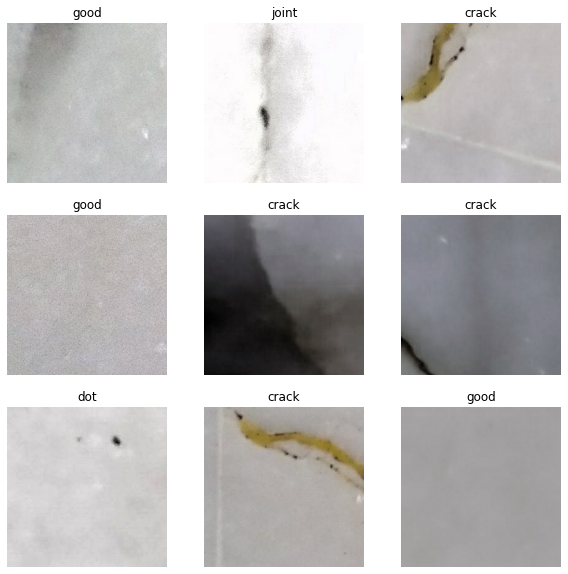

In [9]:
## visualize test images 
image_batch, label_batch = next(iter(test_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

Check the number of classes in the train , validation and test images.

In [10]:

labels = np.array([])
for x, y in train_ds:
    labels = np.concatenate([labels , y.numpy()])
print("Train labels \n{} ".format(pd.Series(labels).value_counts()))

Train labels 
0.0    790
2.0    689
3.0    241
1.0     80
dtype: int64 


In [11]:
labels = np.array([])
for x, y in val_ds:
    labels = np.concatenate([labels , y.numpy()])
print("Validation labels \n{} ".format(pd.Series(labels).value_counts()))

Validation labels 
0.0    194
2.0    171
3.0     72
1.0     12
dtype: int64 


In [12]:
labels = np.array([])
for x, y in test_ds:
    labels = np.concatenate([labels , y.numpy()])
print("Test labels \n{} ".format(pd.Series(labels).value_counts()))

Test labels 
2.0    340
0.0    246
3.0     78
1.0     24
dtype: int64 


The distribution of classes in the train and valdation data is nearly the same. More 'crack' cases followed by 'good' , 'joint' and 'dot.  
How ever in the test data, 'good' cases more than 'crack'.  

2022-01-24 10:42:43.452764: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CPU times: user 3min 56s, sys: 32.6 s, total: 4min 28s
Wall time: 3min 49s
57/57 [==============================] - 3s 39ms/step - loss: 0.1627 - accuracy: 0.9406
Train image accuracy :0.9405555725097656
22/22 [==============================] - 1s 33ms/step - loss: 0.6354 - accuracy: 0.8794
Test image accuracy :0.8793604373931885


2022-01-24 10:46:35.143799: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0

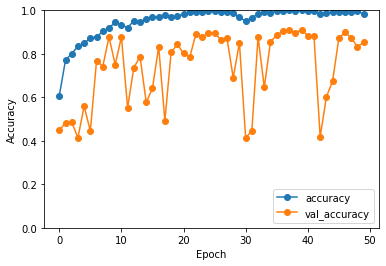

In [13]:
## 6 layer CNN + Batch normalization 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 

    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=50, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_5')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))